In [114]:
import numpy as np
from numpy import linalg as LA
import math as mp
import matplotlib.pyplot as plt
from tqdm import tqdm

import tt
from tt.cross import rect_cross

In [2]:
def tt_sample(ind):
    N = ind.shape[0]
    f = np.zeros(N)
    for i in range(N):
        f[i] = np.sin(np.sum(ind[i,:]))
    return f

In [3]:
n = 10
d = 20
f = rect_cross.cross(lambda arg: tt_sample(arg),
                                    tt.rand(n, d, r=2),
                                    nswp = 5,
                                    eps = 1e-6,
                                    kickrank = 2,
                                    rf = 1,
                                    verbose = True)
f = f.round(1e-6)
print(f.r)

swp: 0/4 er_rel = 2.6e+03 er_abs = 1.8e+13 erank = 6.0 fun_eval: 5920
swp: 1/4 er_rel = 1.5e-15 er_abs = 1.1e-05 erank = 10.3 fun_eval: 29760
[1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1]


In [4]:
e = tt.ones(n, d)
integral = tt.dot(e, f)
print(integral)

938855.7179027


# Task

In [102]:
n = 2
d = 25

# covariation matrix

C = np.zeros((d,d))
for i in range(d):
    C[i,i:] = C[i:,i] = i + 1
    
C_inv = LA.inv(C)

In [103]:
# evaluating

def tt_sample(ind):
    N = ind.shape[0]
    f = np.zeros(N)
    for i in range(N):
        x = ind[i]
        scalar = x.dot(C_inv.dot(x))
        f[i] = mp.exp(-1/2*scalar)
    return f

In [104]:
# TT-cross

a = 10
gridfun = lambda ind: ind*2*a/n - a
f = rect_cross.cross(lambda arg: tt_sample(gridfun(arg)),
                                    tt.rand(n, d, r=2),
                                    nswp = 5,
                                    eps = 1e-6,
                                    kickrank = 2,
                                    rf = 1,
                                    verbose = True)
f = f.round(1e-6)
print(f.r)

swp: 0/4 er_rel = 1.1e+06 er_abs = 1.1e+06 erank = 5.8 fun_eval: 1420
swp: 1/4 er_rel = 1.3e-16 er_abs = 1.3e-16 erank = 9.3 fun_eval: 6636
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [105]:
# integral calculating

e = tt.ones(n, d)
integral = tt.dot(e, f) #/ ((2 * mp.pi)**(d/2) * mp.sqrt(LA.det(C)))
print(integral)

0.9999999999999994


In [106]:
(2 * mp.pi)**(d/2)

9489609784.428713

# Dependence from size of TT

In [128]:
def tt_sample(ind, M):
    N = ind.shape[0]
    f = np.zeros(N)
    for i in range(N):
        x = ind[i]
        scalar = x.dot(M.dot(x))
        f[i] = mp.exp(-1/2*scalar)
    return f

def TT_cross(n, d):
    
    C = np.zeros((d,d))
    for i in range(d):
        C[i,i:] = C[i:,i] = i + 1

    C_inv = LA.inv(C)
    
    a = 10
    gridfun = lambda ind: ind*2*a/n - a
    f = rect_cross.cross(lambda arg: tt_sample(gridfun(arg), C_inv),
                                        tt.rand(n, d, r=2),
                                        nswp = 5,
                                        eps = 1e-6,
                                        kickrank = 2,
                                        rf = 1,
                                        verbose = False)
    f = f.round(1e-6)
    
    e = tt.ones(n, d)
    integral = tt.dot(e, f) #/ ((2 * mp.pi)**(d/2) * mp.sqrt(LA.det(C)))
#     coefficient = (2 * mp.pi)**(d/2)
    
    return integral#, coefficient

100%|██████████| 37/37 [00:42<00:00,  1.16s/it]


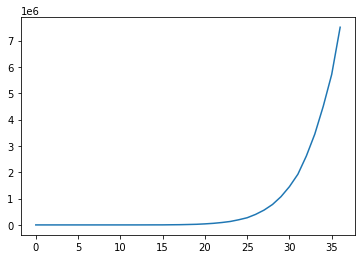

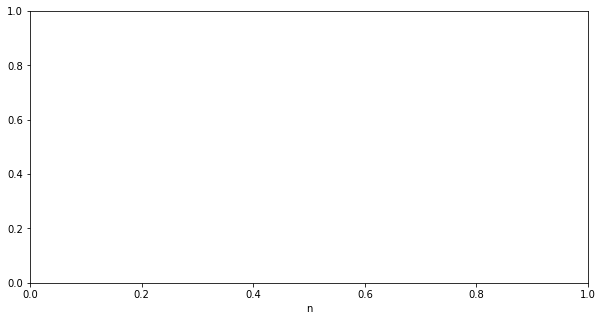

In [120]:
integrals = []
coeffs = []
for n in tqdm(range(3,40)):
    integral, coeff = TT_cross(n, 10)
    integrals.append(integral)
    coeffs.append(coeff)

plt.plot(integrals)
plt.xlabel("n")
plt.show()

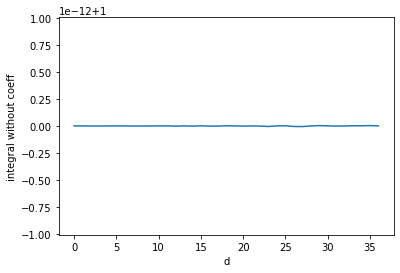

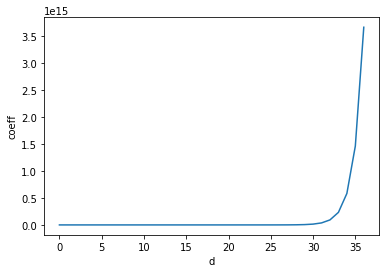

In [127]:
integrals = []
coeffs = []
for d in range(3,40):
    integral, coeff = TT_cross(2, d)
    integrals.append(integral)
    coeffs.append(coeff)

plt.plot(integrals)
plt.xlabel("d")
plt.ylabel("integral without coeff")
plt.show()
plt.plot(coeffs)
plt.xlabel("d")
plt.ylabel("coeff")
plt.show()

100%|██████████| 17/17 [01:56<00:00,  6.86s/it]


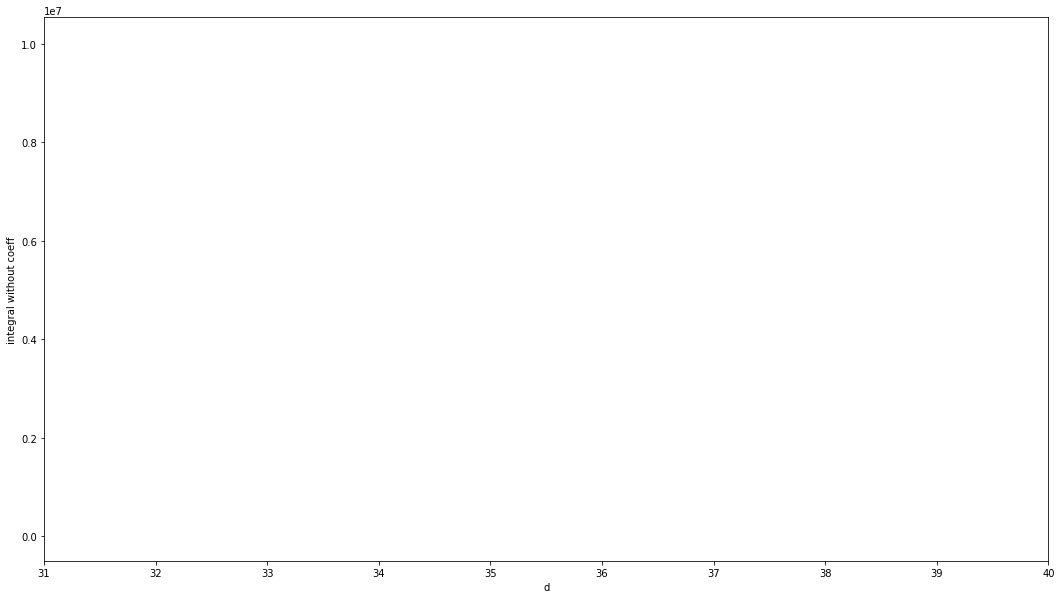

In [129]:
integrals = []
plt.figure(figsize=(18, 10))
for n in tqdm(range(3,20)):
    integral_n = []
    for d in range(3,20):
        integral = TT_cross(n, d)
        integral_n.append(integral)
    integrals.append(integral_n)
    plt.plot(integral_n, label=r'n = '+str(n))

plt.xlim(31,40)
plt.xlabel("d")
plt.ylabel("integral without coeff")
plt.show()

100%|██████████| 17/17 [00:00<00:00, 939.89it/s]


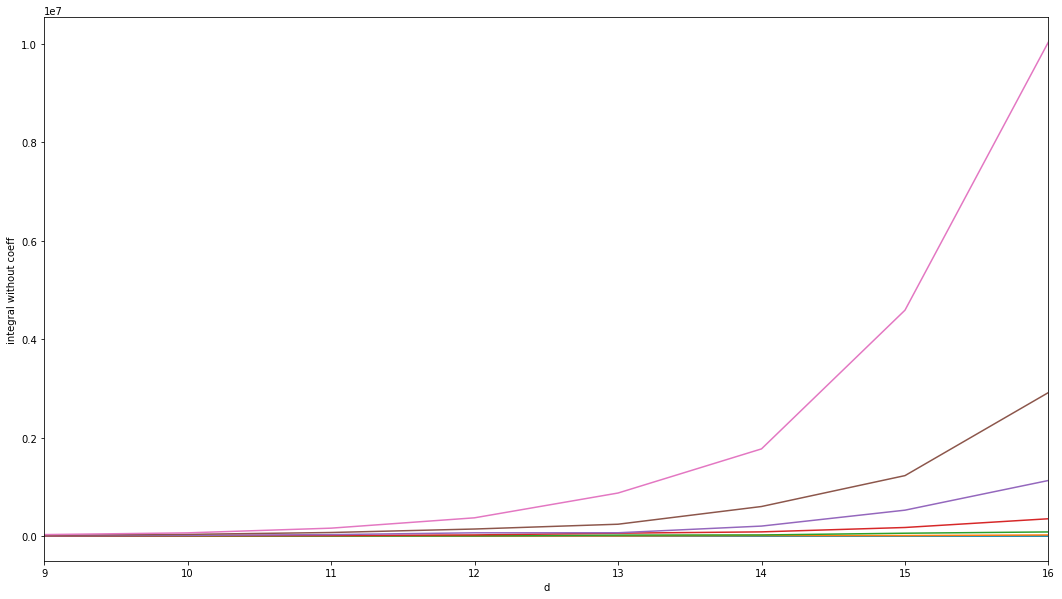

In [137]:
plt.figure(figsize=(18, 10))
for i in tqdm(range(17)):
    plt.plot(integrals[i], label=r'n = '+str(n))

plt.xlim(9,16)
plt.xlabel("d")
plt.ylabel("integral without coeff")
plt.show()